In [97]:
# package imports
import gc
import pandas as pd
import numpy as np 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split

# 相关全局设置
pd.set_option('display.max_columns', None)

sns.set()

np.random.seed(2020)

In [98]:
data_train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
data_testA = pd.read_csv('used_car_testA_20200313.csv', sep=' ')
data = pd.concat([data_train, data_testA])

# EDA

## 查看数据集整体情况

用pandas的.head()等方法，查看数据的具体形式；用.info()查看数据的类型和数据量；用.describe查看数据极值、均值、方差等统计指标以及在回归等问题中，需要保持量纲一致，方法是对变量进行归一化。

In [28]:
data_train.head().append(data_train.tail())
data_train.describe()
data_train.info()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [27]:
data_testA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48587 non-null  float64
 6   fuelType           47107 non-null  float64
 7   gearbox            48090 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

## 数据缺失和异常
通过查看数据结合赛题给出的数据信息，我们可以把特征分成三部分，分别是日期特征、类别特征、数值特征。然后看看每一维特征的缺失率、类别个数和异常值（异常值不处理可能会造成过拟合）等信息

In [37]:
#这个区别方式适用于没有数据脱敏。这里因为数据脱敏，比如name应该是类别变量。所以此方法这里不适用，只能手动区分了
#numeric_features = data_train.select_dtypes(include=[np.number])
date_cols = ['regDate', 'creatDate']
cate_cols = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode', 'seller', 'offerType']
num_cols = ['power', 'kilometer'] + ['v_{}'.format(i) for i in range(15)]
cols = date_cols + cate_cols + num_cols

,variable,value
0,power,60.000000
1,power,0.000000
2,power,163.000000
3,power,193.000000
4,power,68.000000
...,...,...
2533624,v_14,-0.302592
2533625,v_14,-0.272160
2533626,v_14,0.414931
2533627,v_14,-1.659014


In [36]:
tmp = pd.DataFrame()
tmp['count'] = data[cols].count().values
tmp['missing_rate'] = (data.shape[0] - tmp['count']) / data.shape[0]
tmp['nunique'] = data[cols].nunique().values
tmp.index = cols
tmp

,count,missing_sum,nunique
regDate,200000,0.000000,3900
creatDate,200000,0.000000,101
name,200000,0.000000,128466
model,199999,0.000005,248
brand,200000,0.000000,40
bodyType,194081,0.029595,8
fuelType,188427,0.057865,7
gearbox,192109,0.039455,2
notRepairedDamage,200000,0.000000,3
regionCode,200000,0.000000,8021


In [1]:
#通过箱线图查看异常值
sns.violinplot(np.log(data_train['price']))

NameError: name 'sns' is not defined

## 数据分布

### 查看预测值的分布

目标变量要尽量符合高斯分布。有很多算法的前提假设是数据符合正态分布，例如线性回归里面最小二次法的一个前提假设就是数据符合正态分布。下面两个图分布是目标变量转换前，转换后

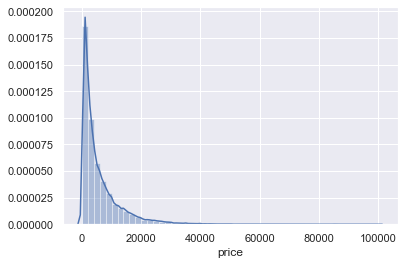

In [39]:
sns.distplot(data_train['price'])

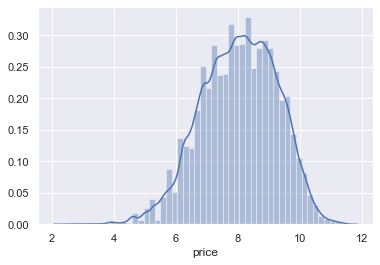

In [11]:
sns.distplot(np.log(data_train['price']))

### 查看偏度和峰值
如果训练集和测试集分布不一致，就要考虑进行分布转换。还好，我们这里数据分布都很一致，不需要转换

In [74]:
tmp = pd.DataFrame(index = num_cols)
for col in num_cols:
    tmp.loc[col, 'train_Skewness'] = data_train[col].skew()
    tmp.loc[col, 'test_Skewness'] = data_testA[col].skew()
    tmp.loc[col, 'train_Kurtosis'] = data_train[col].kurt()
    tmp.loc[col, 'test_Kurtosis'] = data_testA[col].kurt()
tmp

,train_Skewness,test_Skewness,train_Kurtosis,test_Kurtosis
power,65.863178,63.538280,5733.451054,5345.533033
kilometer,-1.525921,-1.521108,1.141934,1.132841
v_0,-1.316712,-1.258401,3.993841,3.871399
v_1,0.359454,0.358008,-1.753017,-1.751179
v_2,4.842556,4.963595,23.860591,25.326363
v_3,0.106292,0.116168,-0.418006,-0.397698
v_4,0.367989,0.367582,-0.197295,-0.193412
v_5,-4.737094,-4.855631,22.934081,24.346355
v_6,0.368073,0.366688,-1.742567,-1.740357
v_7,5.130233,5.282035,25.845489,27.606450


## 数值型特征分析

### 相关性分析
为后期特征选择做准备

v_3         -0.730946
kilometer   -0.440519
v_11        -0.275320
v_10        -0.246175
v_9         -0.206205
v_4         -0.147085
v_7         -0.053024
v_13        -0.013993
v_14         0.035911
v_1          0.060914
v_6          0.068970
v_2          0.085322
v_5          0.164317
power        0.219834
v_0          0.628397
v_8          0.685798
v_12         0.692823
price        1.000000
Name: price, dtype: float64

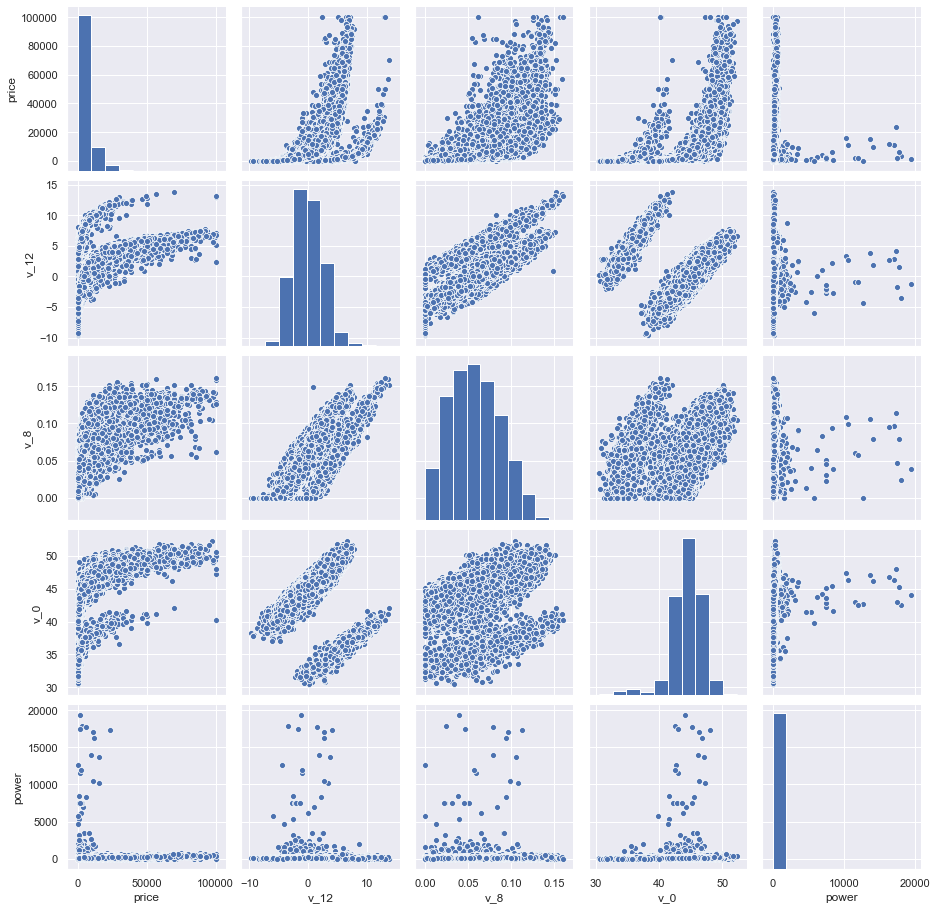

In [82]:
#特征与目标变量之前的相关性分析
correlation = data_train[num_cols+['price']].corr()
correlation['price'].sort_values()

#特征相互之间的关系可视化
sns.pairplot(data_train[num_cols+['price']])
#数据太多，取几个做一个大致分析
# sns.pairplot(data_train[['price', 'v_12', 'v_8' , 'v_0', 'power']])

## 类别特征分析

### 查看类别个数及其分布情况
类别倾斜非常严重的可以删掉，比如：seller、offerType

有异常值的要处理，比如：notRepairedDamage

In [84]:
for col in cate_cols:
    col
    data_train[col].value_counts()

'name'

708       282
387       282
55        280
1541      263
203       233
         ... 
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64

'model'

0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
245.0        2
209.0        2
240.0        2
242.0        2
247.0        1
Name: model, Length: 248, dtype: int64

'brand'

0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: brand, dtype: int64

'bodyType'

0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64

'fuelType'

0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64

'gearbox'

0.0    111623
1.0     32396
Name: gearbox, dtype: int64

'notRepairedDamage'

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

'regionCode'

419     369
764     258
125     137
176     136
462     134
       ... 
6414      1
7063      1
4239      1
5931      1
7267      1
Name: regionCode, Length: 7905, dtype: int64

'seller'

0    149999
1         1
Name: seller, dtype: int64

'offerType'

0    150000
Name: offerType, dtype: int64

In [56]:
for col in cate_cols:
    col
    data_testA[col].value_counts()

'name'

55       97
708      96
387      95
1541     88
713      74
         ..
22270     1
89855     1
42752     1
48899     1
11808     1
Name: name, Length: 37453, dtype: int64

'model'

0.0      3896
19.0     3245
4.0      3007
1.0      1981
29.0     1742
         ... 
242.0       1
240.0       1
244.0       1
243.0       1
246.0       1
Name: model, Length: 247, dtype: int64

'brand'

0     10348
4      5763
14     5314
10     4766
1      4532
6      3502
9      2423
5      1569
13     1245
11      919
7       795
3       773
16      771
8       704
25      695
27      650
21      544
15      511
20      450
19      450
12      389
22      363
30      324
17      317
26      303
24      268
28      225
32      193
29      117
31      115
18      106
2       104
37       92
34       77
33       76
36       67
23       62
35       53
38       23
39        2
Name: brand, dtype: int64

'bodyType'

0.0    13985
1.0    11882
2.0     9900
3.0     4433
4.0     3303
5.0     2537
6.0     2116
7.0      431
Name: bodyType, dtype: int64

'fuelType'

0.0    30656
1.0    15544
2.0      774
3.0       72
4.0       37
6.0       14
5.0       10
Name: fuelType, dtype: int64

'gearbox'

0.0    37301
1.0    10789
Name: gearbox, dtype: int64

'notRepairedDamage'

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

'regionCode'

419     146
764      78
188      52
125      51
759      51
       ... 
7753      1
7463      1
7230      1
826       1
112       1
Name: regionCode, Length: 6971, dtype: int64

'seller'

0    50000
Name: seller, dtype: int64

'offerType'

0    50000
Name: offerType, dtype: int64

# 特征工程

## 数据清洗

### 处理缺失值

### 处理异常值

In [99]:
# 这里我包装了一个异常值处理的代码，可以随便调用。
def outliers_proc(data, col_name, scale=3):
    """
    用于清洗异常值，默认用 box_plot（scale=3）进行清洗
    :param data: 接收 pandas 数据格式
    :param col_name: pandas 列名
    :param scale: 尺度
    :return:
    """

    def box_plot_outliers(data_ser, box_scale):
        """
        利用箱线图去除异常值
        :param data_ser: 接收 pandas.Series 数据格式
        :param box_scale: 箱线图尺度，
        :return:
        """
        iqr = box_scale * (data_ser.quantile(0.75) - data_ser.quantile(0.25))
        val_low = data_ser.quantile(0.25) - iqr
        val_up = data_ser.quantile(0.75) + iqr
        rule_low = (data_ser < val_low)
        rule_up = (data_ser > val_up)
        return (rule_low, rule_up), (val_low, val_up)

    data_n = data.copy()
    data_series = data_n[col_name]
    rule, value = box_plot_outliers(data_series, box_scale=scale)
    index = np.arange(data_series.shape[0])[rule[0] | rule[1]]
    print("Delete number is: {}".format(len(index)))
    data_n = data_n.drop(index)
    data_n.reset_index(drop=True, inplace=True)
    print("Now column number is: {}".format(data_n.shape[0]))
    index_low = np.arange(data_series.shape[0])[rule[0]]
    outliers = data_series.iloc[index_low]
    print("Description of data less than the lower bound is:")
    print(pd.Series(outliers).describe())
    index_up = np.arange(data_series.shape[0])[rule[1]]
    outliers = data_series.iloc[index_up]
    print("Description of data larger than the upper bound is:")
    print(pd.Series(outliers).describe())
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 7))
    sns.boxplot(y=data[col_name], data=data, palette="Set1", ax=ax[0])
    sns.boxplot(y=data_n[col_name], data=data_n, palette="Set1", ax=ax[1])
    return data_n

Delete number is: 963
Now column number is: 149037
Description of data less than the lower bound is:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: power, dtype: float64
Description of data larger than the upper bound is:
count      963.000000
mean       846.836968
std       1929.418081
min        376.000000
25%        400.000000
50%        436.000000
75%        514.000000
max      19312.000000
Name: power, dtype: float64


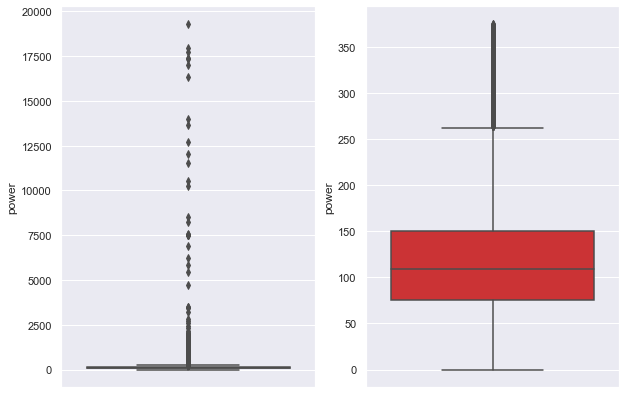

In [100]:
data_train = outliers_proc(data_train, 'power', scale=3)

### 分布不均

In [6]:
# price不符合正态分布
data['price'] = np.log(data['price']+1)

## 连续型数据处理

In [101]:
# 数据分桶 以 power 为例
# 这时候我们的缺失值也进桶了，
# 为什么要做数据分桶呢，原因有很多，= =
# 1. 离散后稀疏向量内积乘法运算速度更快，计算结果也方便存储，容易扩展；
# 2. 离散后的特征对异常值更具鲁棒性，如 age>30 为 1 否则为 0，对于年龄为 200 的也不会对模型造成很大的干扰；
# 3. LR 属于广义线性模型，表达能力有限，经过离散化后，每个变量有单独的权重，这相当于引入了非线性，能够提升模型的表达能力，加大拟合；
# 4. 离散后特征可以进行特征交叉，提升表达能力，由 M+N 个变量编程 M*N 个变量，进一步引入非线形，提升了表达能力；
# 5. 特征离散后模型更稳定，如用户年龄区间，不会因为用户年龄长了一岁就变化

# 当然还有很多原因，LightGBM 在改进 XGBoost 时就增加了数据分桶，增强了模型的泛化性

bin = [i*10 for i in range(31)]
data['power_bin'] = pd.cut(data['power'], bin, labels=False)
data[['power_bin', 'power']].head()

,power_bin,power
0,5.0,60
1,NaN,0
2,16.0,163
3,19.0,193
4,6.0,68


## 离散型数据处理

In [102]:
data = pd.get_dummies(data, columns=['model', 'brand', 'notRepairedDamage', 'power_bin'])
data.columns

Index(['SaleID', 'name', 'regDate', 'bodyType', 'fuelType', 'gearbox', 'power',
       'kilometer', 'regionCode', 'seller',
       ...
       'power_bin_20.0', 'power_bin_21.0', 'power_bin_22.0', 'power_bin_23.0',
       'power_bin_24.0', 'power_bin_25.0', 'power_bin_26.0', 'power_bin_27.0',
       'power_bin_28.0', 'power_bin_29.0'],
      dtype='object', length=349)

## 特征选择

### 特征增加

In [103]:
# 使用时间：data['creatDate'] - data['regDate']，反应汽车使用时间，一般来说价格与使用时间成反比
# 不过要注意，数据里有时间出错的格式，所以我们需要 errors='coerce'
data['used_time'] = (pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - 
                            pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days
# 看一下空数据，有 15k 个样本的时间是有问题的，我们可以选择删除，也可以选择放着。
# 但是这里不建议删除，因为删除缺失数据占总样本量过大，7.5%
# 我们可以先放着，因为如果我们 XGBoost 之类的决策树，其本身就能处理缺失值，所以可以不用管；
data['used_time'].isnull().sum()

15101

In [104]:
# 从邮编中提取城市信息，相当于加入了先验知识
data['city'] = data['regionCode'].apply(lambda x : str(x)[:-3])

### 删除特征

In [105]:
# 删除不需要的数据
data.drop(columns =['SaleID', 'seller', 'offerType', 'creatDate', 'regDate', 'regionCode', 'power'], inplace=True)
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 49999
Columns: 344 entries, name to city
dtypes: float64(21), int64(1), object(1), uint8(321)
memory usage: 97.8+ MB


Index(['name', 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'price', 'v_0',
       'v_1', 'v_2', 'v_3',
       ...
       'power_bin_22.0', 'power_bin_23.0', 'power_bin_24.0', 'power_bin_25.0',
       'power_bin_26.0', 'power_bin_27.0', 'power_bin_28.0', 'power_bin_29.0',
       'used_time', 'city'],
      dtype='object', length=344)

## 保存数据

In [106]:
# 目前的数据其实已经可以给树模型使用了，所以我们导出一下
data.to_csv('data_for_tree.csv', index=0)

## 根据不同模型更细致化处理数据

此时的源数据就可以直接从data_for_tree获取了

# 模型

In [107]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() 
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() 
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [108]:
data_pre = reduce_mem_usage(pd.read_csv('data_for_tree.csv'))

Memory usage of dataframe is 550400128.00 MB
Memory usage after optimization is: 74200128.00 MB
Decreased by 86.5%


In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor

In [110]:
#划分训练集和测试集
data_test_pre = data_pre[data_pre['price'].isnull()].copy()
data_test_pre.drop('price', axis = 1, inplace = True)

data_train_pre = data_pre[data_pre['price'].notnull()].copy()


x_train = data_train_pre.drop('price', axis = 1)
y_train = data_train_pre['price']


In [111]:
x_train.columns
data_test_pre.columns

Index(['name', 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'v_0', 'v_1',
       'v_2', 'v_3', 'v_4',
       ...
       'power_bin_22.0', 'power_bin_23.0', 'power_bin_24.0', 'power_bin_25.0',
       'power_bin_26.0', 'power_bin_27.0', 'power_bin_28.0', 'power_bin_29.0',
       'used_time', 'city'],
      dtype='object', length=343)

Index(['name', 'bodyType', 'fuelType', 'gearbox', 'kilometer', 'v_0', 'v_1',
       'v_2', 'v_3', 'v_4',
       ...
       'power_bin_22.0', 'power_bin_23.0', 'power_bin_24.0', 'power_bin_25.0',
       'power_bin_26.0', 'power_bin_27.0', 'power_bin_28.0', 'power_bin_29.0',
       'used_time', 'city'],
      dtype='object', length=343)

## 模型选择

In [ ]:
model = RandomForestRegressor()

In [18]:
model = LGBMRegressor()

## 模型分析

In [116]:
y_train = np.log(y_train+1)

In [112]:
y_train[y_train>200000]

Series([], Name: price, dtype: float32)

### 模型状态

In [113]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_absolute_error

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, score=None, n_jobs=1, 
                        train_sizes=np.linspace(0.1, 1.0, 8), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为5份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=score, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('trian number')
        plt.ylabel('score')
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='train score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='test score')
    
        plt.legend(loc='best')
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

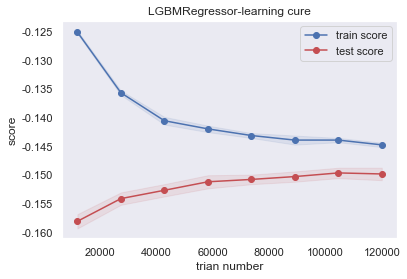

(-0.14761188888722698, 0.006530925373757518)

In [117]:
plot_learning_curve(model, model.__class__.__name__+'-learning cure', x_train, y_train, score = 'neg_mean_absolute_error')

In [30]:
result = model.predict(data_test_pre)

In [35]:
type(result)
result[result>10]

numpy.ndarray

array([10.27840662, 10.08525334, 10.08808824, ..., 10.17103201,
       10.18706619, 10.17062004])

# 保存提交结果

In [36]:
result = np.exp(result) - 1
result[result<10]=10  ## 去除过小的预测值

sub = pd.DataFrame()
sub['SaleID'] = data_testA['SaleID']
sub['price'] = result
sub.to_csv('sub_randomForest.csv',index=False)